In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, silhouette_samples

from sklearn.cluster import KMeans

import matplotlib.cm as cm

import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Корисні функції 

In [2]:
def estimation_linear_regr(y_train, y_test, y_train_pred, y_test_pred):
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss  = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)

    return train_loss, test_loss, r2_train, r2_test

In [3]:
def plot_predictions(y, y_pred):
    plt.figure(figsize=(6, 4))
    
    plt.scatter(y, y_pred, color = 'blue', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")

    plt.tight_layout()
    plt.show()

In [4]:
def plot_predictions_vs_actual(y_test, y_test_pred, y_train, y_train_pred):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_test_pred, color = 'blue', alpha = 0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")

    plt.subplot(1, 2, 2)
    plt.scatter(y_train, y_train_pred, label = 'train')
    plt.scatter(y_test, y_test_pred, label = 'test')
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [108]:
def plot_silhoettes(range_n_clusters : list, X : pd.DataFrame, col_1 : str, col_2 : str):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # 1-й підграфік - це графік силуетів. 
        # (N_clusters + 1) * 10 призначено для вставки пустого простору між графіками силуетів окремих кластерів, щоб чітко їх розмежувати.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Ініціюємо кластеризатор
        clusterer = KMeans(n_clusters = n_clusters, random_state = 10, n_init = 'auto')
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("Для n_clusters =", n_clusters,
            "Середнє значення silhouette_score становить:", silhouette_avg)

        # Розраховуємо метрику силуету для кожного екземпляра в наборі даних
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Агрегація оцінок силуетів для зразків, що належать кластеру i, і їх сортування
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Позначимо силуетні області номерами кластерів посередині.
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Обчислимо нове значення y_lower для наступного графіка
            y_lower = y_upper + 10

        ax1.set_title("Графік силуетів для різних кластерів.")
        ax1.set_xlabel("Значення коефіцієнта силуету")
        ax1.set_ylabel("Мітка кластера")

        # Вертикальна лінія - середнє значення силуету для всіх значень.
        ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

        ax1.set_yticks([])  # Прибрати мітки на осі y
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2-й підграфік, що показує фактично сформовані кластери
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[col_1], X[col_2], marker = ".", s = 30, lw = 0, alpha = 0.7, c = colors, edgecolor = "k"
        )

        ax2.set_title("Візуалізація кластеризованих даних.")
        ax2.set_xlabel("Простір ознак для 1-ї ознаки")
        ax2.set_ylabel("Простір ознак для 2-ї ознаки")

        plt.suptitle(
            "Аналіз силуетів для кластеризації KMeans на зразкових даних з n_clusters = %d"
            % n_clusters,
            fontsize = 14,
            fontweight = "bold",
        )

    plt.show()

# Завдання 1

## 1. Завантаження та підготовка даних

In [5]:
# Завантаження датасету California Housing

california_housing_sklearn = fetch_california_housing()

df_housing = pd.DataFrame(data = california_housing_sklearn.data,
                           columns = california_housing_sklearn.feature_names)

df_housing['target'] = california_housing_sklearn.target

In [8]:
df_housing.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [9]:
# Розділення даних на навчальну та тестову вибірку

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(df_housing.drop(columns = ['target']), 
                                                                                    df_housing['target'], 
                                                                                    test_size = 0.2, 
                                                                                    random_state = 42)

In [10]:
display(X_train_housing.head(), y_train_housing.head())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: target, dtype: float64

## 2. Побудова регресійної моделі

In [11]:
# Побудова базової лінійної регресійної моделі на основі навчальної вибірки

# масштабування ознак
scaler = StandardScaler()
X_train_scaled_housing = pd.DataFrame(scaler.fit_transform(X_train_housing), columns = X_train_housing.columns)
X_test_scaled_housing  = pd.DataFrame(scaler.transform(X_test_housing), columns = X_train_housing.columns)

# побудова моделі лінійної регресії
lin_reg = LinearRegression()

lin_reg.fit(X_train_scaled_housing, y_train_housing)

y_train_pred_lin_housing = lin_reg.predict(X_train_scaled_housing)
y_test_pred_lin_housing  = lin_reg.predict(X_test_scaled_housing)

# оцінка точності моделі на тестовій вибірці та визначення її продуктивності
train_loss_lin_housing, test_loss_lin_housing, r2_train_lin_housing, r2_test_lin_housing = estimation_linear_regr(y_train_housing, 
                                                                                                                  y_test_housing, 
                                                                                                                  y_train_pred_lin_housing, 
                                                                                                                  y_test_pred_lin_housing)

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss_lin_housing, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss_lin_housing, 2)}')
print(f'\nКоефіцієнт детермінації (R²) на тренувальному наборі даних: {round(r2_train_lin_housing, 2)}')
print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {round(r2_test_lin_housing, 2)}')

Помилка моделі на тренувальному наборі даних: 0.52
Помилка моделі на тестувальному наборі даних: 0.56

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.61
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.58


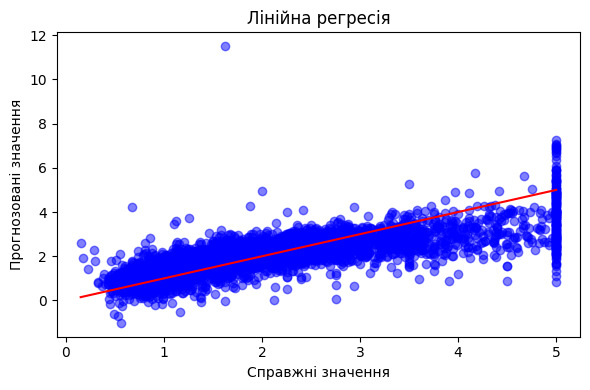

In [18]:
plot_predictions(y_test_housing, y_test_pred_lin_housing)

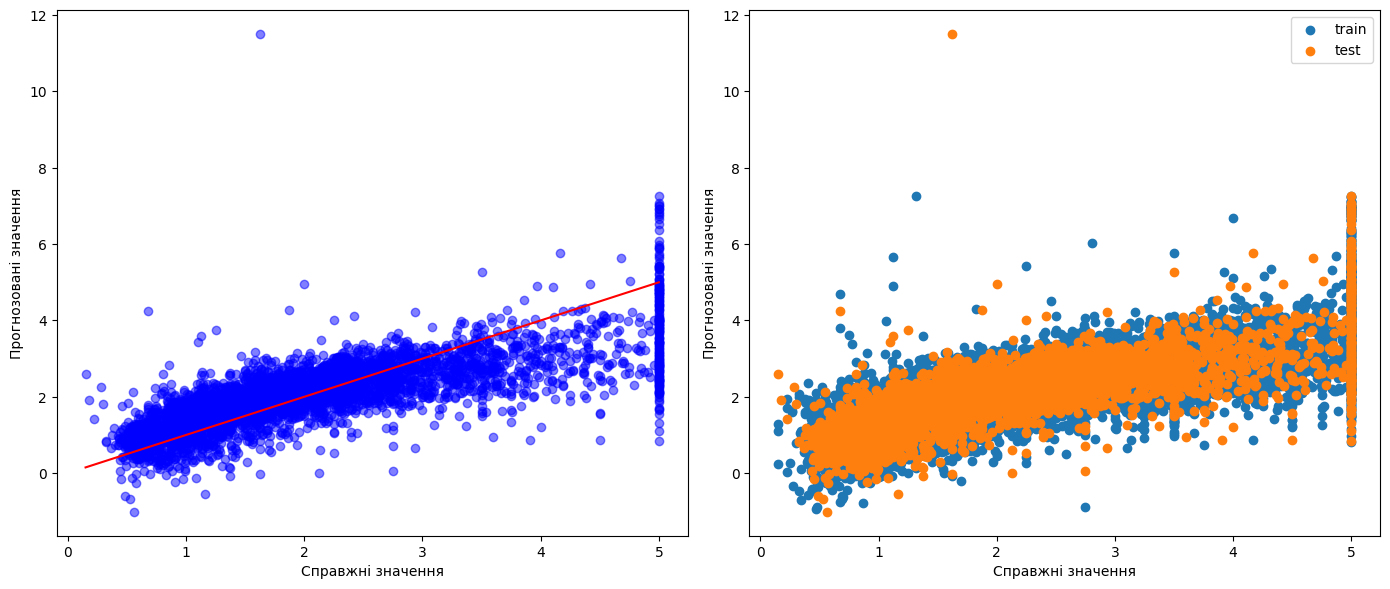

In [32]:
plot_predictions_vs_actual(y_test_housing, y_test_pred_lin_housing, y_train_housing, y_train_pred_lin_housing)

## 3. Аналіз перенавчання

Помилка на тренувальному і тестовому наборах даних:
 - Помилка на тренувальному наборі даних становить 0.52
 - Помилка на тестовому наборі даних становить 0.56
 - Це вказує на те, що модель працює трохи гірше на тестовому наборі даних, ніж на тренувальному. Різниця не дуже велика, що свідчить про те, що модель не сильно перенавчена (overfitting) і має досить непогану узагальнювальну здатність.

Коефіцієнт детермінації (R²):
 - Коефіцієнт R² на тренувальному наборі даних становить 0.61
 - Коефіцієнт R² на тестовому наборі даних становить 0.58
 - Коефіцієнт R² показує, яка частка варіації залежної змінної пояснюється моделлю. Значення R², близькі до 1, вказують на хорошу відповідність моделі даним. В даному випадку R² на тренувальному наборі є 0.61, а на тестовому – 0.58. Це означає, що модель пояснює приблизно 58-61% варіації залежної змінної, що є досить прийнятним результатом, особливо для лінійної регресії. Проте можна сказати, що є місце для покращення моделі.

## 4. Запобігання перенавчанню

LinearRegression():
Помилка моделі на тренувальному наборі даних: 0.5179331255246699
Помилка моделі на тестувальному наборі даних: 0.5558915986952444

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.6125511913966952
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.5757877060324508



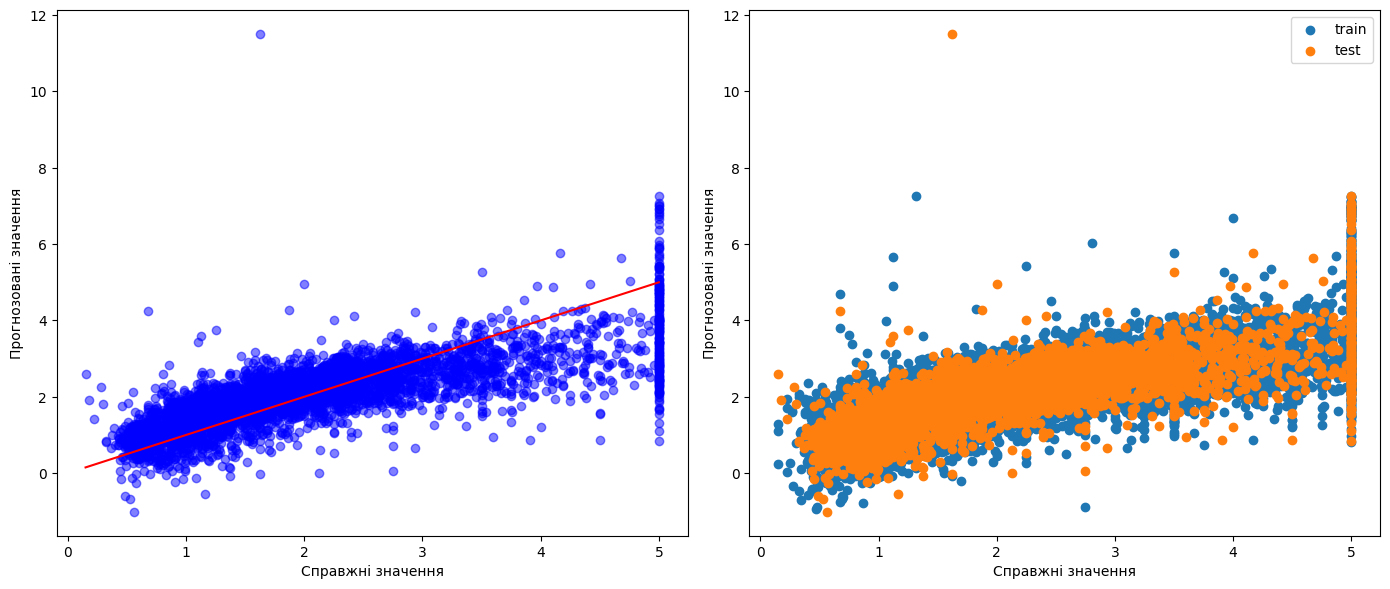

Ridge():
Помилка моделі на тренувальному наборі даних: 0.5179332184751891
Помилка моделі на тестувальному наборі даних: 0.555854858943597

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.6125511218634558
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.5758157428913684



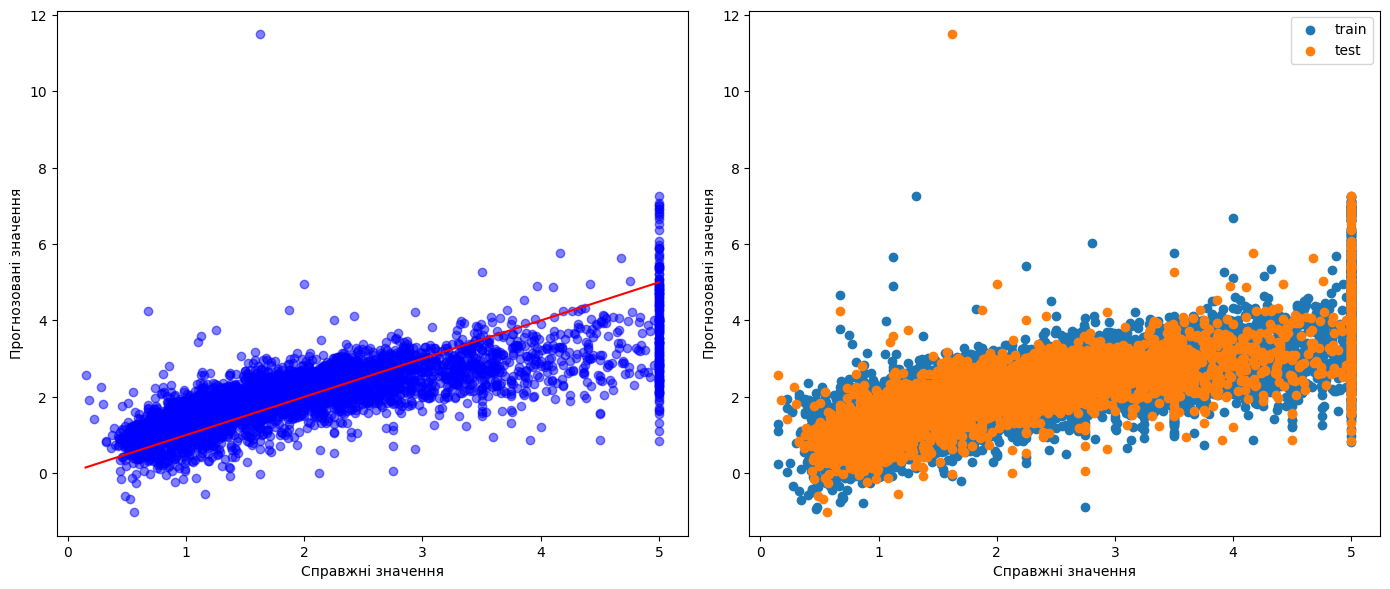

Ridge(alpha=2):
Помилка моделі на тренувальному наборі даних: 0.5179334967045764
Помилка моделі на тестувальному наборі даних: 0.5558183597384528

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.6125509137291634
Коефіцієнт детермінації (R²) на тестувальному наборі даних: 0.5758435961843099



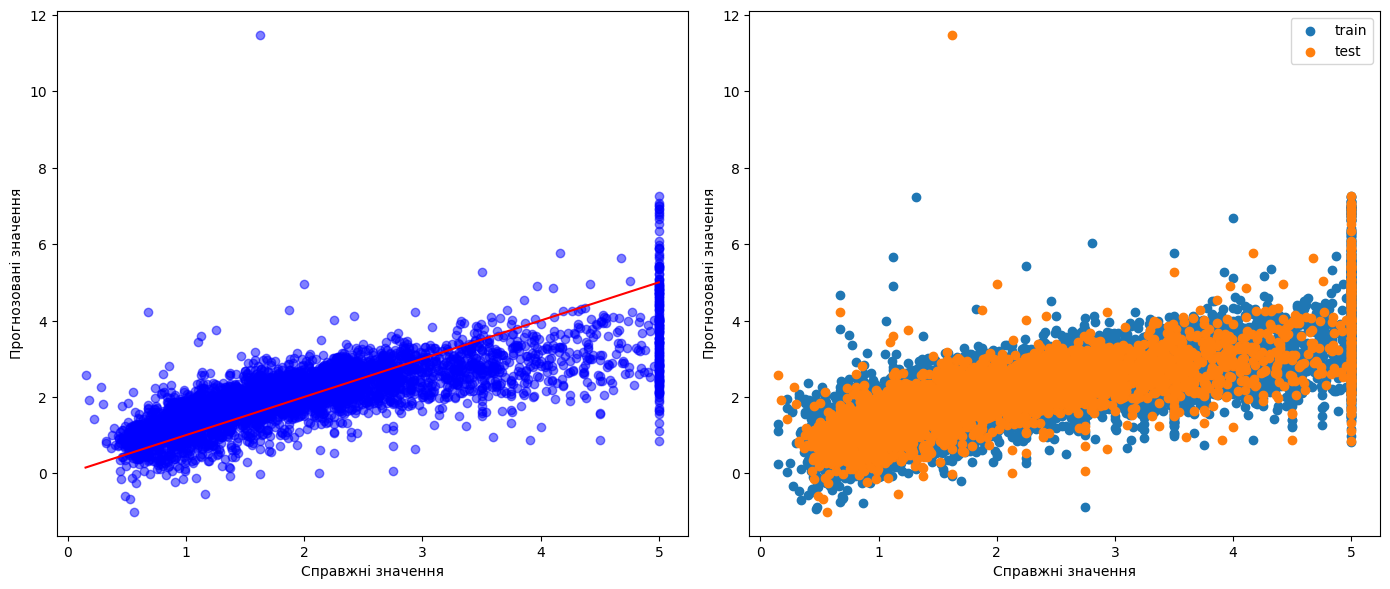

Lasso():
Помилка моделі на тренувальному наборі даних: 1.336778211789427
Помилка моделі на тестувальному наборі даних: 1.3106960720039365

Коефіцієнт детермінації (R²) на тренувальному наборі даних: 0.0
Коефіцієнт детермінації (R²) на тестувальному наборі даних: -0.00021908714592466794



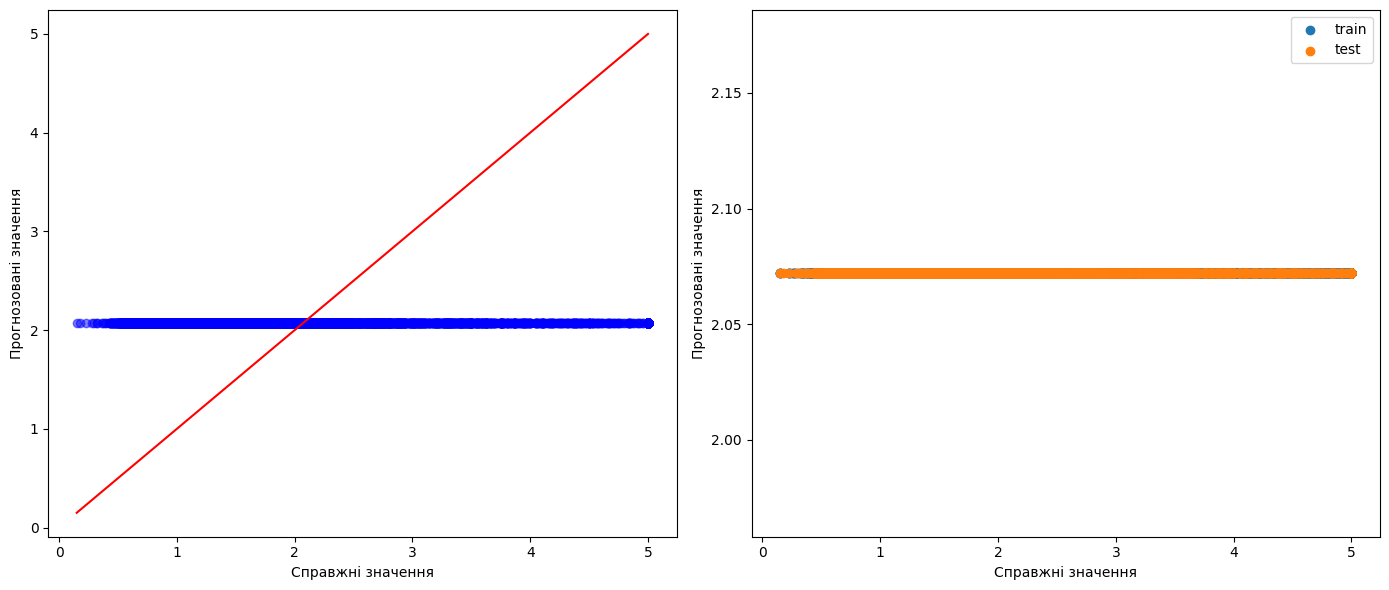

In [44]:
# використання моделей регуляризації
models = [
    LinearRegression(),
    Ridge(),
    Ridge(alpha = 2),
    Lasso()
]

for model in models:
    model.fit(X_train_scaled_housing, y_train_housing)

    y_train_pred = model.predict(X_train_scaled_housing)
    y_test_pred  = model.predict(X_test_scaled_housing)

    eval_results = estimation_linear_regr(y_train_housing, y_test_housing, y_train_pred, y_test_pred)

    print(f'{str(model)}:')
    print(f'Помилка моделі на тренувальному наборі даних: {eval_results[0]}')
    print(f'Помилка моделі на тестувальному наборі даних: {eval_results[1]}')
    print(f'\nКоефіцієнт детермінації (R²) на тренувальному наборі даних: {eval_results[2]}')
    print(f'Коефіцієнт детермінації (R²) на тестувальному наборі даних: {eval_results[3]}\n')
    plot_predictions_vs_actual(y_test_housing, y_test_pred, y_train_housing, y_train_pred)

## 5-6. Оцінка результатів, висновки

Отже:
 - Лінійна регресія показує помірний рівень помилки і коефіцієнт детермінації, що вказує на те, що модель пояснює приблизно 61% варіації на тренувальному наборі і 58% на тестовому.
 - Ridge-регресія показує майже ідентичні результати з лінійною регресією. Це означає, що додавання регуляризації L2 не змінило значущим чином продуктивність моделі.
 - Збільшення коефіцієнта регуляризації в Ridge-регресії не мало значного впливу на результати. Помилка і R² залишаються майже незмінними.
 - Модель Lasso показує значно гірші результати. Вона має високу помилку і дуже низький коефіцієнт детермінації (фактично 0 або навіть негативний), що вказує на те, що ця модель не пояснює варіації залежної змінної, або що L1-регуляризація є занадто сильною, що призвело до надмірного спрощення моделі.
 - Все це також може вказувати на те, що для ваших даних лінійна модель може бути не найкращим вибором.

# Завдання 2

In [12]:
# масштабування ознак

df_housing_scaled = pd.DataFrame(scaler.fit_transform(df_housing), columns = df_housing.columns)

In [13]:
df_housing_scaled.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude    target  
0  -1.327835  2.129631  
1  -1.322844  1.314156  
2  -1.332827  1.258693  
3  -1.337818  1.165100  
4  -1.337818  1.172900

In [14]:
# розділення даних на два набори X та y

X = df_housing.drop(columns = 'target')
y = df_housing['target']

X_scaled = df_housing_scaled.drop(columns = 'target')
y_scaled = df_housing_scaled['target']

## Kmeans

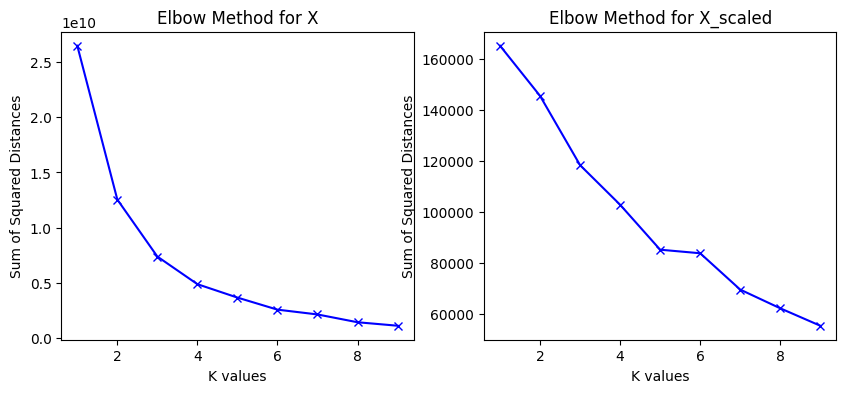

In [67]:
# реалізація методу ліктя для масштабованих та не масштабованих даних

K = range(1,10)
sum_of_squared_distances        = []
sum_of_squared_distances_scaled = []

for k in K:
    model = KMeans(n_clusters = k, n_init = 'auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)
    
    model_scaled = KMeans(n_clusters = k, n_init = 'auto').fit(X_scaled)
    sum_of_squared_distances_scaled.append(model_scaled.inertia_)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for X')

plt.subplot(1, 2, 2)
plt.plot(K, sum_of_squared_distances_scaled, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for X_scaled')

plt.show()

Бачимо, що кількість кластерів може дорівнювати 3 або 4 або 5.

In [90]:
# визначення оптимальної кількості кластерів за допомогою коефіцієнта середнього силуета

print('Not scaled')
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, n_init = 'auto')
    kmeans.fit(X)

    labels = kmeans.predict(X)

    s = silhouette_score(X, labels, metric = 'euclidean')
    print(f'Silhouette Coefficient for the data Dataset Clusters for k = {k}: {s:.2f}')

print('\nScaled')
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, n_init = 'auto')
    kmeans.fit(X_scaled)

    labels = kmeans.predict(X_scaled)

    s = silhouette_score(X_scaled, labels, metric = 'euclidean')
    print(f'Silhouette Coefficient for the data Dataset Clusters for k = {k}: {s:.2f}')

Not scaled
Silhouette Coefficient for the data Dataset Clusters for k = 2: 0.71
Silhouette Coefficient for the data Dataset Clusters for k = 3: 0.61
Silhouette Coefficient for the data Dataset Clusters for k = 4: 0.56
Silhouette Coefficient for the data Dataset Clusters for k = 5: 0.54
Silhouette Coefficient for the data Dataset Clusters for k = 6: 0.54
Silhouette Coefficient for the data Dataset Clusters for k = 7: 0.53
Silhouette Coefficient for the data Dataset Clusters for k = 8: 0.52
Silhouette Coefficient for the data Dataset Clusters for k = 9: 0.52

Scaled
Silhouette Coefficient for the data Dataset Clusters for k = 2: 0.81
Silhouette Coefficient for the data Dataset Clusters for k = 3: 0.33
Silhouette Coefficient for the data Dataset Clusters for k = 4: 0.28
Silhouette Coefficient for the data Dataset Clusters for k = 5: 0.31
Silhouette Coefficient for the data Dataset Clusters for k = 6: 0.29
Silhouette Coefficient for the data Dataset Clusters for k = 7: 0.31
Silhouette Coef

Бачимо, що на не масштабованих даних набагато краще працює метод ліктя. 
Коефіцієнт середнього силуета при k = 2 та k = 3 більш наближений до 1, ніж в інших випадках.

In [71]:
kmeans_2 = KMeans(n_clusters = 2, n_init = 'auto')
kmeans_2.fit(X)
labels_2 = kmeans_2.predict(X)

kmeans_3 = KMeans(n_clusters = 3, n_init = 'auto')
kmeans_3.fit(X)
labels_3 = kmeans_3.predict(X)

## Візуалізація

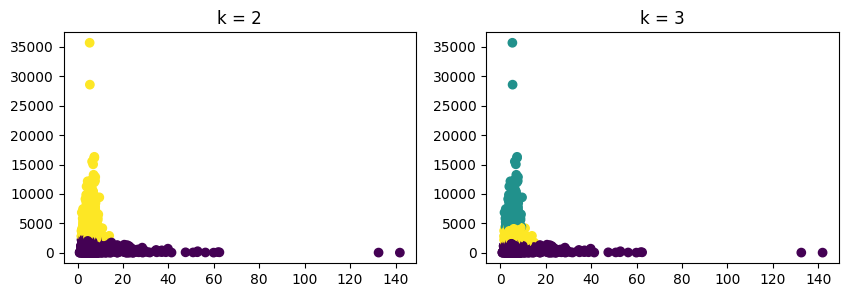

In [104]:
# візуалізація результатів

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(X['AveRooms'], X['Population'], c = labels_2)
plt.title('k = 2');

plt.subplot(1, 2, 2)
plt.scatter(X['AveRooms'], X['Population'], c = labels_3)
plt.title('k = 3');

plt.show()

In [73]:
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [99]:
px.scatter_3d(X, x = 'MedInc', y = 'Population', z = 'AveOccup', color = labels_2)

Додаю зображення, оскільки 3д візуалізація може не відобразитись 

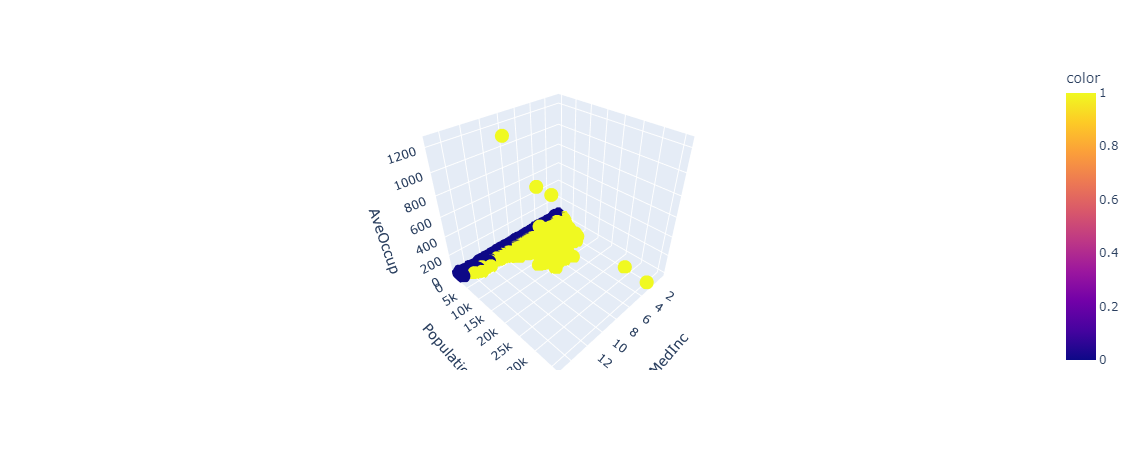

In [100]:
px.scatter_3d(X, x = 'MedInc', y = 'Population', z = 'AveOccup', color = labels_3)

Додаю зображення, оскільки 3д візуалізація може не відобразитись 

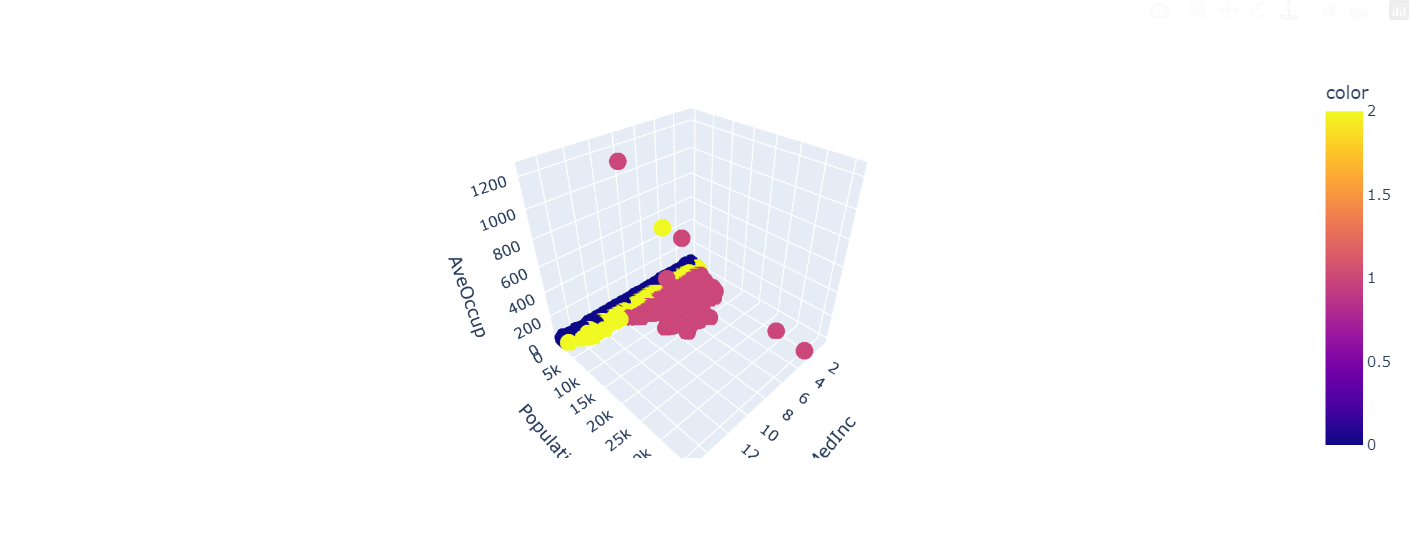

Для n_clusters = 2 Середнє значення silhouette_score становить: 0.7066326748190687
Для n_clusters = 3 Середнє значення silhouette_score становить: 0.6065190494300826


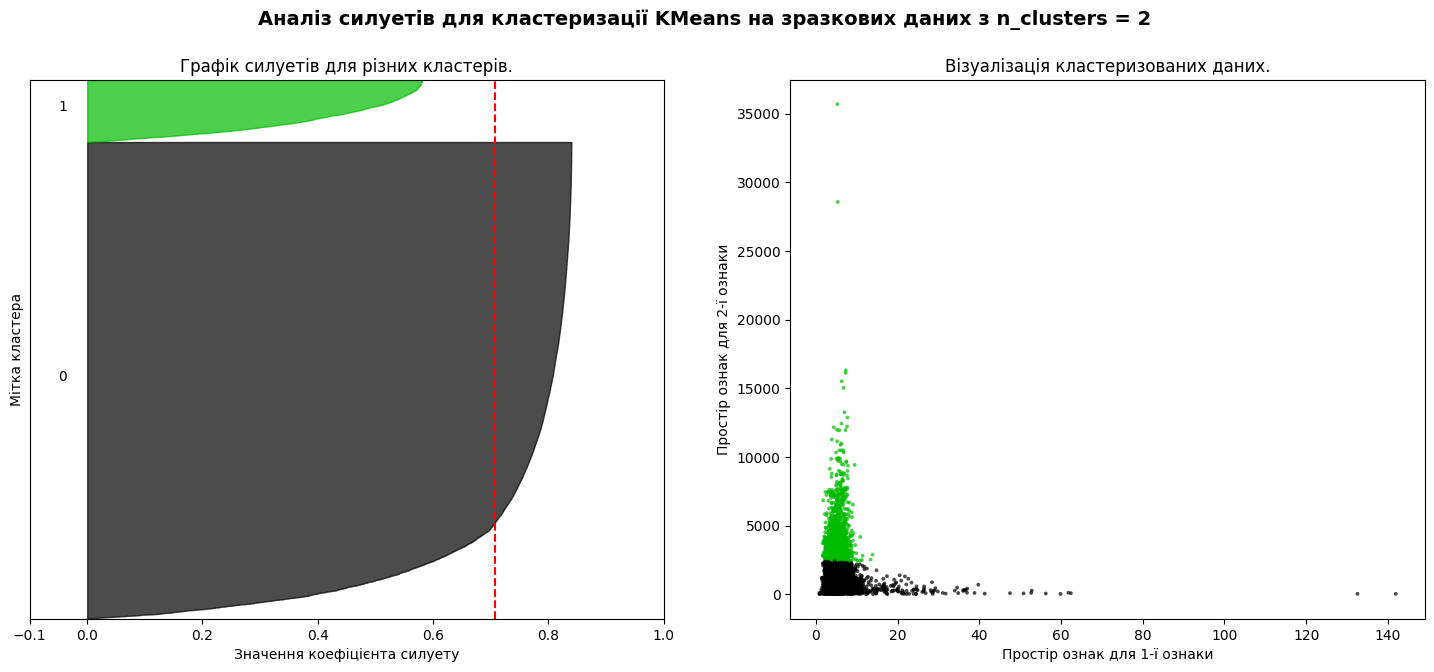

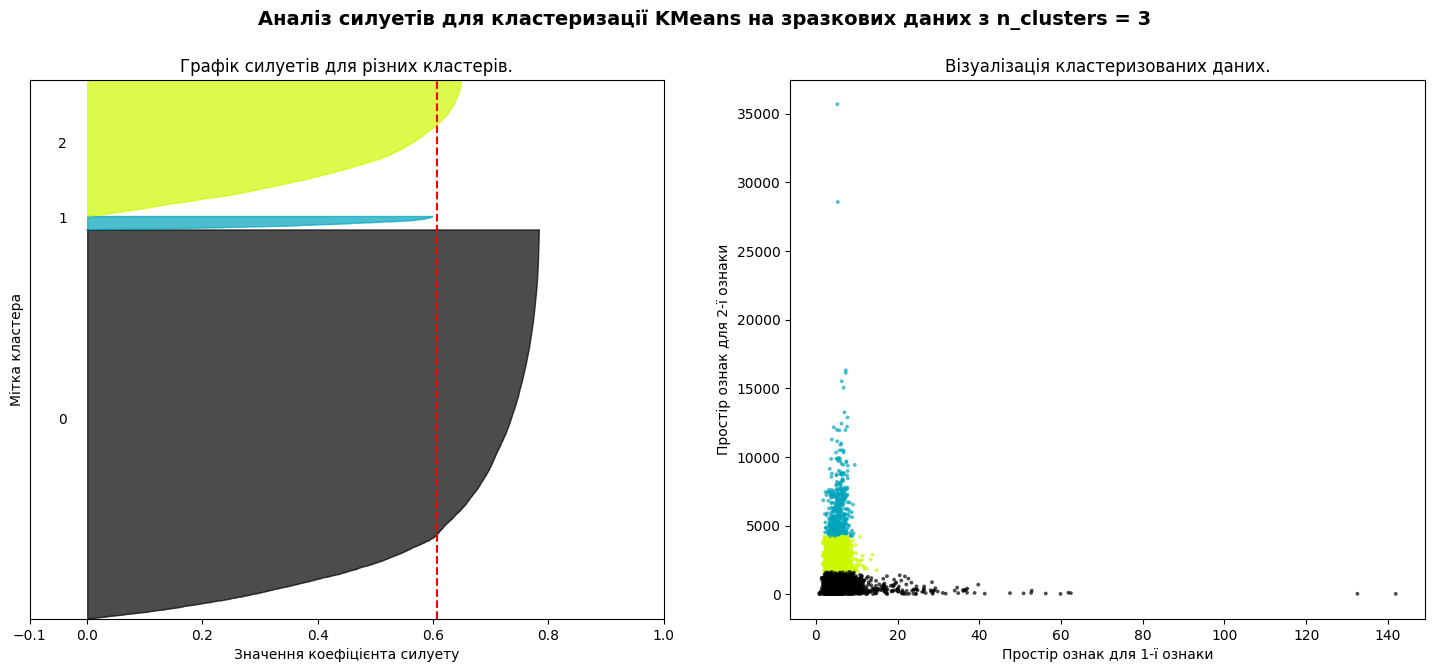

In [109]:
plot_silhoettes([2, 3], X, 'AveRooms', 'Population')

Бачимо, що є викиди, з якими можна в майбутньому попрацювати, але результат доволі непоганий.

## PCA

In [16]:
# Кластеризація
clustering = KMeans(n_clusters=2, n_init='auto')
clustering.fit(X_scaled)

# Прогнозування кластерів
labels = clustering.predict(X_scaled)

# Додавання міток кластерів до даних
cluster_df = X.copy()
cluster_df['labels'] = labels

# Пониження розмірності за допомогою PCA
pca    = PCA(n_components = 3, random_state = 0)
pca_df = pd.DataFrame(pca.fit_transform(cluster_df.drop('labels', axis = 1)), columns = ['PC1', 'PC2', 'PC3'])
pca_df['labels'] = cluster_df.labels

# Візуалізація результатів у 3D
fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    color='labels',
    title='3D Scatter Plot of Dataset with PCA'
)

fig.show()

Додаю зображення, оскільки 3д візуалізація може не відобразитись 

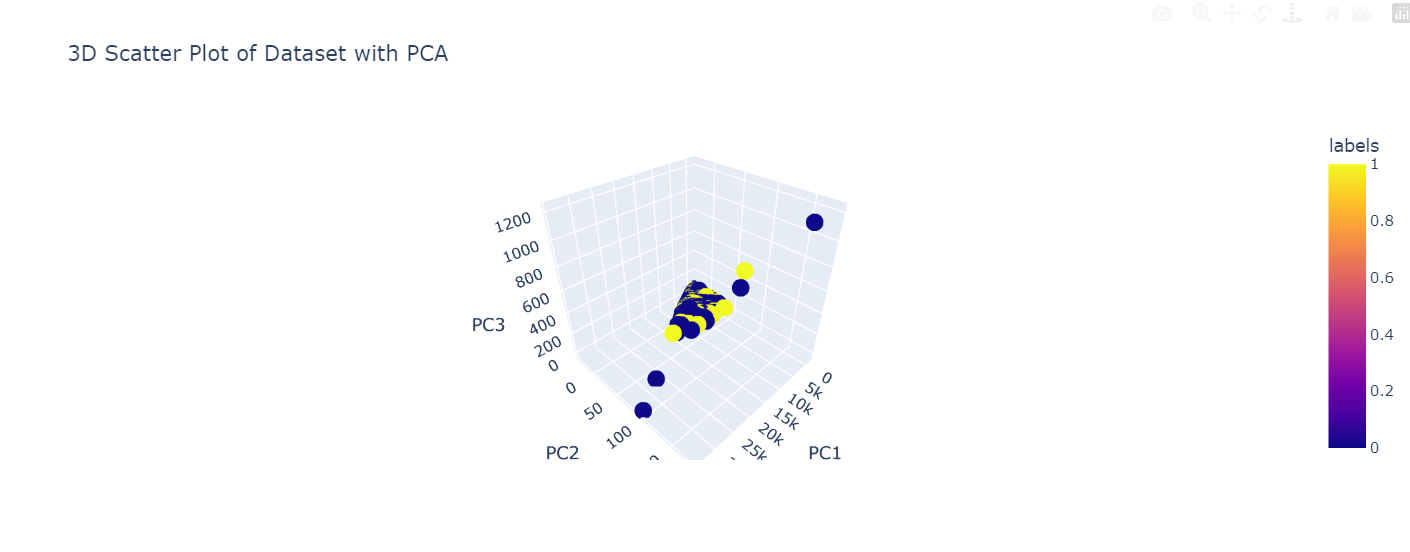

In [17]:
# Розрахунок частки поясненої дисперсії
explained_variance_ratio = pca.explained_variance_ratio_

# Розрахунок кумулятивної частки поясненої дисперсії
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Виведення результатів
print("Частка поясненої дисперсії для кожної компоненти:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {var_ratio:.2%}")

print("\nКумулятивна частка поясненої дисперсії:")
for i, cum_var in enumerate(cumulative_variance_ratio):
    print(f"PC1 to PC{i+1}: {cum_var:.2%}")

Частка поясненої дисперсії для кожної компоненти:
PC1: 99.98%
PC2: 0.01%
PC3: 0.01%

Кумулятивна частка поясненої дисперсії:
PC1 to PC1: 99.98%
PC1 to PC2: 99.99%
PC1 to PC3: 100.00%


Бачимо, що перша компонента пояснює 99.98% варіантивності даних. 

In [18]:
# Обчислення "навантажень" для компонент
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=cluster_df.drop('labels', axis=1).columns)

# Виведення результатів
print("\nPCA Loadings:")
loadings.round(2)


PCA Loadings:


PC1   PC2   PC3
MedInc      0.0 -0.02  0.01
HouseAge   -0.0  0.99 -0.12
AveRooms   -0.0 -0.04  0.01
AveBedrms  -0.0 -0.00  0.00
Population  1.0  0.00 -0.00
AveOccup    0.0  0.12  0.99
Latitude   -0.0 -0.00  0.00
Longitude   0.0 -0.01  0.00

1. PC1 (перша головна компонента):
 - Population має найбільший внесок в PC1 (коефіцієнт 1.0), що свідчить про те, що ця компонента сильно пов'язана з кількістю населення.
 - Решта змінних мають дуже малі коефіцієнти в PC1, що вказує на те, що вони мало впливають на цю компоненту.

2. PC2 (друга головна компонента):
 - HouseAge (коефіцієнт 0.99) є головною змінною для PC2, тобто ця компонента сильно пов'язана з віком будинку.
 - Також невеликий позитивний внесок має AveOccup (коефіцієнт 0.12), що означає певний зв'язок цієї компоненти із середньою кількістю мешканців.

3. PC3 (третя головна компонента):
 - AveOccup (коефіцієнт 0.99) найбільш впливає на PC3, що означає, що ця компонента пов'язана з середньою кількістю мешканців.
 - HouseAge має невеликий негативний внесок у PC3 (коефіцієнт -0.12), що вказує на слабку, але протилежну залежність цієї компоненти від віку будинку.

Загалом:
 - PC1 може бути інтерпретована як компонента, що відображає населення.
 - PC2 сильно відображає вік будинку.
 - PC3 головним чином пов'язана із середньою кількістю мешканців у будинку.

## T-SNE

In [22]:
# Пониження розмірності за допомогою t-SNE
tsne    = TSNE(n_components=2, random_state=0)
tsne_df = pd.DataFrame(tsne.fit_transform(X_scaled), columns=['x', 'y'])

# Додавання міток кластерів
tsne_df['labels'] = labels
tsne_df = pd.concat([tsne_df, X], axis=1)

# Побудова інтерактивного 2D-графіку
fig = px.scatter(
    tsne_df,
    x = 'x',
    y = 'y',
    color = 'labels',
    title = '2D Scatter Plot of Dataset with t-SNE'
)

# Відображення графіку
fig.show()

Додаю зображення, оскільки 3д візуалізація може не відобразитись 

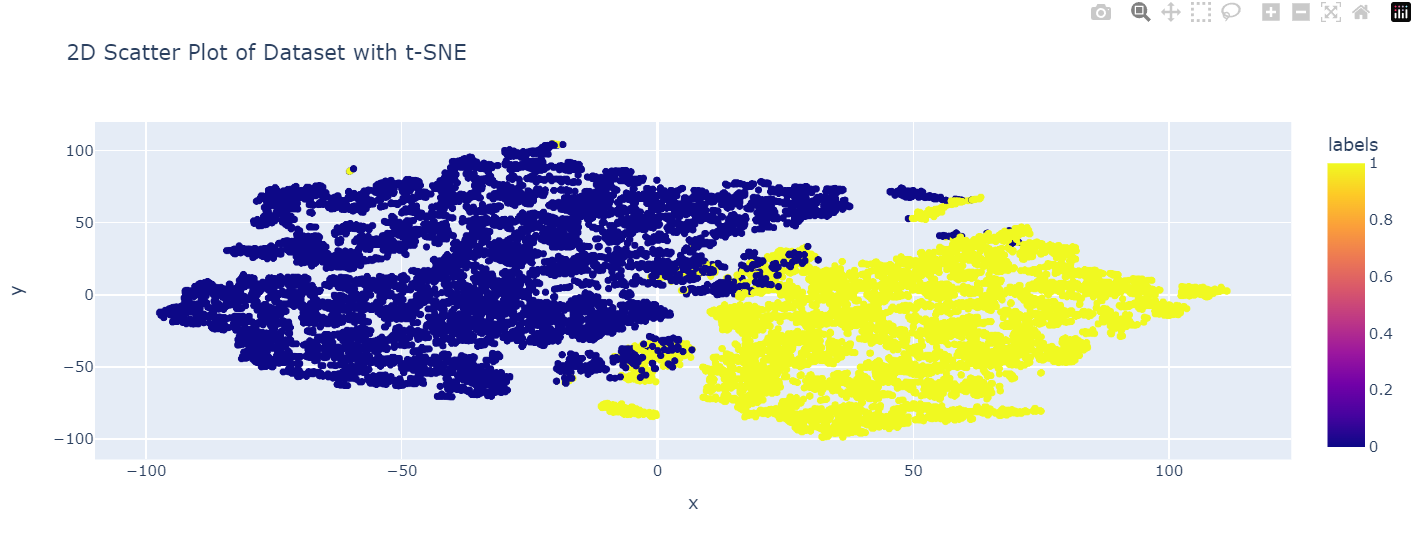

In [23]:
tsne_df.groupby('labels')[X.columns].mean().style.background_gradient(cmap='Blues')

Основні відмінності між кластерами:
 - Кластер 0 знаходиться на більш південних і західних територіях, а кластер 1 — на північних і східних.
 - У кластері 0 спостерігається більше населення і більше мешканців на будинок.
 - Кластер 1 характеризується більшими будинками з більшою кількістю кімнат і спалень, але з меншим населенням і кількістю мешканців на будинок.
 - Будинки в кластері 1 є трохи старшими.
Отже, Ці кластери можуть відображати різні типи житлових районів із відмінними соціально-економічними характеристиками.